In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
tfk = tf.keras
tf.keras.backend.set_floatx("float64")
import tensorflow_probability as tfp
tfd = tfp.distributions
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [ ]:
scaler = StandardScaler()
detector = IsolationForest(n_estimators=1000, behaviour="deprecated", contamination="auto", random_state=0)
neg_log_likelihood = lambda x, rv_x: -rv_x.log_prob(x)

In [ ]:
df1 = pd.read_csv('FinalTraining.csv')

In [ ]:
df2 = pd.read_csv('KURNOOL.csv')

In [ ]:
df3 = pd.read_csv('Training_Dataset.csv')

In [ ]:
df2.head()

,Unnamed: 0,State,District,year,quarter,rainfall,relative_humidity,average_temperature,NSP Male/ NewMicConfMale,NSP Female/ NewMicConf Female,NSP Total/ NewMicConf Total,Relapse Male,Relapse Female,NSN Male/NewClinDiag Male,NSN Female/NewClinDiag Female,NEP Male,NEP Female,0-14 yrs NSP(NewAll207+) Male,0-14 yrs NSP(NewAll207+) Female,15-24 yrs NSP(NewAll207+) Male,15-24 yrs NSP(NewAll207+) Female,25-34 yrs NSP(NewAll207+) Male,25-34 yrs NSP(NewAll207+) Female,35-44 yrs NSP(NewAll207+) Male,35-44 yrs NSP(NewAll207+) Female,45-54 yrs NSP(NewAll207+) Male,45-54 yrs NSP(NewAll207+) Female,55-64 yrs NSP(NewAll207+) Male,55-64 yrs NSP(NewAll207+) Female,65 & above yrs NSP(NewAll207+) Male,65 & above yrs NSP(NewAll207+) Female,SumOfHIV_Tested,SumOfHIV_infected,so2,no2,rspm
0,0,ANDHRAPRADESH,KURNOOL,2008,1,157.3,54.810337,26.115425,374,146,520,74,23,408,246,50,52,3,4,52,33,76,46,85,29,82,20,52,10,24,4,0,0,4.0,11.644444,73.074074
1,1,ANDHRAPRADESH,KURNOOL,2008,2,103.7,51.573703,30.960950,403,159,562,79,23,352,204,50,87,1,5,47,38,82,40,85,33,86,17,55,12,47,14,141,29,4.0,11.148276,69.482759
2,2,ANDHRAPRADESH,KURNOOL,2008,3,551.1,76.170427,27.490968,360,158,518,86,25,340,182,68,68,1,2,45,37,59,41,86,27,85,22,51,16,33,13,91,26,4.0,9.683333,68.458333
3,3,ANDHRAPRADESH,KURNOOL,2008,4,136.4,72.451817,25.137025,376,141,517,73,13,373,219,74,73,1,5,51,31,56,37,73,28,79,19,77,14,39,7,79,33,4.0,9.692308,73.615385
4,4,ANDHRAPRADESH,KURNOOL,2009,1,4.0,45.412247,26.929551,376,125,501,89,12,377,221,55,76,5,3,54,35,63,43,78,13,82,12,67,14,27,5,244,54,4.0,9.000000,76.230769


In [ ]:
data = df1

In [ ]:
columns = df1.columns

In [ ]:
X_t = scaler.fit_transform(data)

In [ ]:
is_inlier = detector.fit_predict(X_t)
X_t = X_t[(is_inlier > 0),:]

In [ ]:
dataset = pd.DataFrame(X_t, columns=columns)

In [ ]:
n_epochs = 50
n_samples = dataset.shape[0]
n_batches = 10
batch_size = np.floor(n_samples/n_batches)
buffer_size = n_samples

In [ ]:
data = tf.data.Dataset.from_tensor_slices((dataset[inputs].values, dataset[outputs].values))
data = data.shuffle(n_samples, reshuffle_each_iteration=True)

In [ ]:
inputs = ['Assam', 'Kerala', 'Punjab', 'ALAPPUZHA', 'AMRITSAR', 'BARNALA',
       'BARPETA', 'BATHINDA', 'BONGAIGAON', 'CACHAR', 'DARRANG', 'DHEMAJI',
       'DHUBRI', 'DIBRUGARH', 'ERNAKULAM', 'FARIDKOT', 'FIROZPUR', 'GOALPARA',
       'GOLAGHAT', 'GURDASPUR', 'HAILAKANDI', 'HOSHIARPUR', 'IDUKKI',
       'JALANDHAR', 'JORHAT', 'KAMRUP', 'KANNUR', 'KAPURTHALA',
       'KARBI ANGLONG', 'KARBI_ANGLONG', 'KARIMGANJ', 'KASARAGOD', 'KOKRAJHAR',
       'KOLLAM', 'KOTTAYAM', 'KOZHIKODE', 'LAKHIMPUR', 'LUDHIANA',
       'MALAPPURAM', 'MANSA', 'MANSA-PN', 'MANSA-PU', 'MARIGAON', 'MOGA',
       'MOHALI', 'MUKTSAR', 'NAGAON', 'NALBARI', 'NAWANSHAHR',
       'NORTH CACHAR HILLS', 'NORTH_CACHAR_HILLS', 'PALAKKAD',
       'PATHANAMTHITTA', 'PATIALA', 'RUPNAGAR', 'SANGRUR', 'SIBSAGAR',
       'SONITPUR', 'THIRUVANANTHAPURAM', 'THRISSUR', 'TINSUKIA', 'WAYANAD',
       'QTR', 'YR',  'NEP Male', 'NEP Female',
       '0-14 yrs NSP(NewAll207+) Male', '0-14 yrs NSP(NewAll207+) Female',
       '15-24 yrs NSP(NewAll207+) Male', '15-24 yrs NSP(NewAll207+) Female',
       '25-34 yrs NSP(NewAll207+) Male', '25-34 yrs NSP(NewAll207+) Female',
       '35-44 yrs NSP(NewAll207+) Male', '35-44 yrs NSP(NewAll207+) Female',
       '45-54 yrs NSP(NewAll207+) Male', '45-54 yrs NSP(NewAll207+) Female',
       '55-64 yrs NSP(NewAll207+) Male', '55-64 yrs NSP(NewAll207+) Female',
       '65 & above yrs NSP(NewAll207+) Male',
       '65 & above yrs NSP(NewAll207+) Female', 'Total Failure',
       'SumOfHIV_Tested', 'SumOfHIV_infected']

In [ ]:
outputs = ['NSP Total/ NewMicConf Total']

In [ ]:
data_train = data.take(n_train).batch(batch_size).repeat(n_epochs)

In [ ]:
n_train = int(0.7*dataset.shape[0])

In [ ]:
data_test = data.skip(n_train).batch(1).repeat(n_epochs)

In [ ]:
prior = tfd.Independent(tfd.Normal(loc=tf.zeros(len(outputs), dtype=tf.float64), scale=1.0), reinterpreted_batch_ndims=1)

In [ ]:
model = tfk.Sequential([
tfk.layers.InputLayer(input_shape=(len(inputs),), name="input"),
tfk.layers.Dense(10, activation="relu", name="dense_1"),
tfk.layers.Dense(tfp.layers.MultivariateNormalTriL.params_size(
len(outputs)), activation=None, name="distribution_weights"),
tfp.layers.MultivariateNormalTriL(len(outputs), activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior, weight=1/n_batches), name="output")
], name="model")

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


In [ ]:
model.compile(optimizer="adam", loss=neg_log_likelihood)

In [ ]:
model.fit(data_train, epochs=n_epochs, validation_data=data_test, verbose=True)

Epoch 1/50
400/400 [==============================] - 24s 61ms/step - loss: -1.3083 - val_loss: -1.4025
Epoch 2/50
400/400 [==============================] - 24s 60ms/step - loss: -1.3399 - val_loss: -1.4274
Epoch 3/50
400/400 [==============================] - 24s 60ms/step - loss: -1.3607 - val_loss: -1.4675
Epoch 4/50
400/400 [==============================] - 24s 61ms/step - loss: -1.4314 - val_loss: -1.5554
Epoch 5/50
400/400 [==============================] - 24s 60ms/step - loss: -1.4471 - val_loss: -1.4179
Epoch 6/50
400/400 [==============================] - 24s 61ms/step - loss: -1.4918 - val_loss: -1.6024
Epoch 7/50
400/400 [==============================] - 24s 61ms/step - loss: -1.5079 - val_loss: -1.6560
Epoch 8/50
400/400 [==============================] - 24s 60ms/step - loss: -1.5197 - val_loss: -1.5637
Epoch 9/50
400/400 [==============================] - 24s 60ms/step - loss: -1.5546 - val_loss: -1.6460
Epoch 10/50
400/400 [==============================] - 24s 60ms/

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                840       
_________________________________________________________________
distribution_weights (Dense) (None, 2)                 22        
_________________________________________________________________
output (MultivariateNormalTr ((None, 1), (None, 1))    0         
Total params: 862
Trainable params: 862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tfp.layers.DenseFlipout(10, activation="relu", name="dense_1")

In [ ]:
samples = 500
iterations = 10
test_iterator = tf.compat.v1.data.make_one_shot_iterator(data_test)
X_true, Y_true, Y_pred = np.empty(shape=(samples, len(inputs))), np.empty(shape=(samples, len(outputs))), np.empty(shape=(samples, len(outputs), iterations))
for i in range(samples):
    features, labels = test_iterator.get_next()
    X_true[i,:] = features
    Y_true[i,:] = labels.numpy()
    for k in range(iterations):
        Y_pred[i,:,k] = model.predict(features)

In [ ]:
Y_pred_m = np.mean(Y_pred, axis=-1)
Y_pred_s = np.std(Y_pred, axis=-1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y_pred

array([[[-0.81499884, -1.1084699 , -0.9894187 , ..., -0.83834182,
         -0.58568695, -0.8002734 ]],

       [[-0.34232815, -0.34451815, -0.35464663, ..., -0.33588638,
         -0.34725149, -0.34759492]],

       [[-0.35292212, -0.358026  , -0.341563  , ..., -0.32573135,
         -0.35031369, -0.34259272]],

       ...,

       [[ 1.51853263,  1.5211636 ,  1.53501292, ...,  1.5262244 ,
          1.51632519,  1.5162568 ]],

       [[ 0.0988949 ,  0.1015916 ,  0.10487161, ...,  0.09662427,
          0.0937954 ,  0.09697843]],

       [[-1.14988805, -1.13534992, -1.11088267, ..., -1.12565582,
         -1.13559075, -1.13167187]]])

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
Y_pred[0]

array([[-0.84326348, -0.85543561, -0.84355244, -0.8521146 , -0.83381743,
        -0.85906922, -0.85464145, -0.83734008, -0.84818428, -0.84933914]])

In [ ]:
Y_true[0]

array([-0.84287597])

In [ ]:
for x in Y_pred:
  y_pred.append(x.mean())

In [ ]:
y_pred = []

In [ ]:
len(y_pred)

500

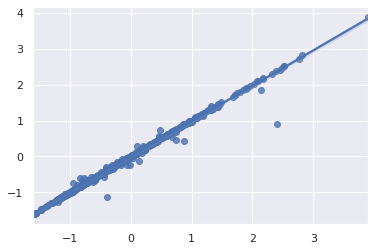

In [ ]:
sns.regplot(x=Y_true, y=np.array(y_pred));